In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [83]:
mushroom=pd.read_csv("C:/Users/student/Downloads/mushrooms.csv")

In [3]:
mushroom

,type,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,poisonous,convex,smooth,brown,yes,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,yes,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,yes,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,yes,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,edible,knobbed,smooth,brown,no,none,attached,close,broad,yellow,...,smooth,orange,orange,partial,orange,one,pendant,buff,clustered,leaves
8120,edible,convex,smooth,brown,no,none,attached,close,broad,yellow,...,smooth,orange,orange,partial,brown,one,pendant,buff,several,leaves
8121,edible,flat,smooth,brown,no,none,attached,close,broad,brown,...,smooth,orange,orange,partial,orange,one,pendant,buff,clustered,leaves
8122,poisonous,knobbed,scaly,brown,no,fishy,free,close,narrow,buff,...,silky,white,white,partial,white,one,evanescent,white,several,leaves


In [4]:
mushroom.describe()

,type,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,edible,convex,scaly,brown,no,none,free,close,broad,buff,...,smooth,white,white,partial,white,one,pendant,white,several,woods
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [5]:
mushroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
type                        8124 non-null object
cap_shape                   8124 non-null object
cap_surface                 8124 non-null object
cap_color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill_attachment             8124 non-null object
gill_spacing                8124 non-null object
gill_size                   8124 non-null object
gill_color                  8124 non-null object
stalk_shape                 8124 non-null object
stalk_root                  8124 non-null object
stalk_surface_above_ring    8124 non-null object
stalk_surface_below_ring    8124 non-null object
stalk_color_above_ring      8124 non-null object
stalk_color_below_ring      8124 non-null object
veil_type                   8124 non-null object
veil_color                  8124 non-null object
ring_number

In [6]:
mushroom['type'].value_counts()

edible       4208
poisonous    3916
Name: type, dtype: int64

In [7]:
mushroom.isnull().sum() #NA값없는것 확인`

type                        0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
dtype: int64

In [9]:
mushroom['veil_type'].value_counts() #veil type이 모두 Partial로 동일하기 때문에 분류에 영향이 없어 제거

partial    8124
Name: veil_type, dtype: int64

In [ ]:
target=mushroom['type']

In [19]:
mushroom=mushroom.drop('veil_type', axis=1, inplace=False)

In [22]:
mushroom

,type,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,1,2,3,0,1,7,1,0,1,0,...,3,3,7,7,2,1,4,0,3,4
1,0,2,3,9,1,0,1,0,0,0,...,3,3,7,7,2,1,4,1,2,0
2,0,0,3,8,1,1,1,0,0,1,...,3,3,7,7,2,1,4,1,2,2
3,1,2,2,8,1,7,1,0,1,1,...,3,3,7,7,2,1,4,0,3,4
4,0,2,3,3,0,6,1,1,0,0,...,3,3,7,7,2,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,4,3,0,0,6,0,0,0,11,...,3,3,4,4,1,1,4,2,1,1
8120,0,2,3,0,0,6,0,0,0,11,...,3,3,4,4,0,1,4,2,4,1
8121,0,3,3,0,0,6,0,0,0,1,...,3,3,4,4,1,1,4,2,1,1
8122,1,4,2,0,0,3,1,0,1,2,...,3,2,7,7,2,1,0,7,4,1


In [23]:
#카테고리컬 모든 Feature 인코딩 작업

label_encoder= LabelEncoder()

In [24]:
mushroom=mushroom.apply(label_encoder.fit_transform)

In [25]:
mushroom #posionous:1 ,edible:0 과 같이 모든 Feature 인코딩 됨.

,type,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,1,2,3,0,1,7,1,0,1,0,...,3,3,7,7,2,1,4,0,3,4
1,0,2,3,9,1,0,1,0,0,0,...,3,3,7,7,2,1,4,1,2,0
2,0,0,3,8,1,1,1,0,0,1,...,3,3,7,7,2,1,4,1,2,2
3,1,2,2,8,1,7,1,0,1,1,...,3,3,7,7,2,1,4,0,3,4
4,0,2,3,3,0,6,1,1,0,0,...,3,3,7,7,2,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,4,3,0,0,6,0,0,0,11,...,3,3,4,4,1,1,4,2,1,1
8120,0,2,3,0,0,6,0,0,0,11,...,3,3,4,4,0,1,4,2,4,1
8121,0,3,3,0,0,6,0,0,0,1,...,3,3,4,4,1,1,4,2,1,1
8122,1,4,2,0,0,3,1,0,1,2,...,3,2,7,7,2,1,0,7,4,1


In [26]:
mushroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
type                        8124 non-null int64
cap_shape                   8124 non-null int64
cap_surface                 8124 non-null int64
cap_color                   8124 non-null int64
bruises                     8124 non-null int64
odor                        8124 non-null int64
gill_attachment             8124 non-null int64
gill_spacing                8124 non-null int64
gill_size                   8124 non-null int64
gill_color                  8124 non-null int64
stalk_shape                 8124 non-null int64
stalk_root                  8124 non-null int64
stalk_surface_above_ring    8124 non-null int64
stalk_surface_below_ring    8124 non-null int64
stalk_color_above_ring      8124 non-null int64
stalk_color_below_ring      8124 non-null int64
veil_color                  8124 non-null int64
ring_number                 8124 non-null int64
ring_type                   8

In [27]:
#식용인지 독버섯(비식용)인지 분류하는 문제 => Target: type

x_mushroom=mushroom.iloc[:,1:]
y_mushroom=mushroom.iloc[:,:1]

### Mushroom Features Correlation 

In [28]:
x_mushroom.corr()

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_color,ring_number,ring_type,spore_print_color,population,habitat
cap_shape,1.000000,-0.007059,-0.176574,-0.199703,0.251055,0.032099,-0.061368,0.259001,-0.069180,0.248495,...,-0.070942,-0.068732,-0.059667,-0.067470,0.036995,-0.069245,-0.304673,0.251207,0.129000,0.134210
cap_surface,-0.007059,1.000000,-0.022923,-0.019547,-0.105749,-0.161757,-0.096076,0.274933,-0.122924,0.037139,...,0.015424,-0.000094,0.250617,0.260090,-0.154804,0.060429,-0.171361,0.310188,-0.188979,-0.191609
cap_color,-0.176574,-0.022923,1.000000,0.034513,-0.318907,0.192322,0.023269,-0.091914,-0.020306,-0.240248,...,-0.017087,-0.026967,-0.044439,-0.025502,0.188903,0.010226,0.088491,-0.079787,-0.017712,-0.089724
bruises,-0.199703,-0.019547,0.034513,1.000000,-0.079235,0.137359,-0.299473,-0.369596,0.348658,0.099364,...,0.386893,0.323013,0.197177,0.213054,0.119770,0.056788,0.692973,-0.519982,0.088137,0.305354
odor,0.251055,-0.105749,-0.318907,-0.079235,1.000000,-0.092471,0.114297,0.037037,0.074913,0.344635,...,-0.044410,0.060100,-0.012270,-0.026790,-0.086768,0.164708,-0.161269,0.093370,0.003753,0.126054
gill_attachment,0.032099,-0.161757,0.192322,0.137359,-0.092471,1.000000,0.071489,0.108984,-0.080726,0.186485,...,-0.083189,-0.075554,0.122946,0.116158,0.897518,0.093236,-0.146689,-0.068909,0.165575,0.115387
gill_spacing,-0.061368,-0.096076,0.023269,-0.299473,0.114297,0.071489,1.000000,-0.108333,-0.037735,0.080895,...,-0.298008,-0.241945,0.319259,0.271301,0.073363,0.243014,-0.195897,-0.092992,-0.529253,-0.397884
gill_size,0.259001,0.274933,-0.091914,-0.369596,0.037037,0.108984,-0.108333,1.000000,-0.330580,0.214576,...,0.090346,0.087102,0.271111,0.228629,0.103809,-0.171362,-0.460872,0.549444,0.147682,0.088058
gill_color,-0.069180,-0.122924,-0.020306,0.348658,0.074913,-0.080726,-0.037735,-0.330580,1.000000,-0.185632,...,0.114802,0.057044,-0.064741,-0.101458,-0.048532,0.235151,0.389234,-0.144126,0.027168,0.185011
stalk_shape,0.248495,0.037139,-0.240248,0.099364,0.344635,0.186485,0.080895,0.214576,-0.185632,1.000000,...,-0.041495,0.057663,0.228784,0.251239,0.162604,-0.293221,-0.291444,0.038177,0.087383,0.239285


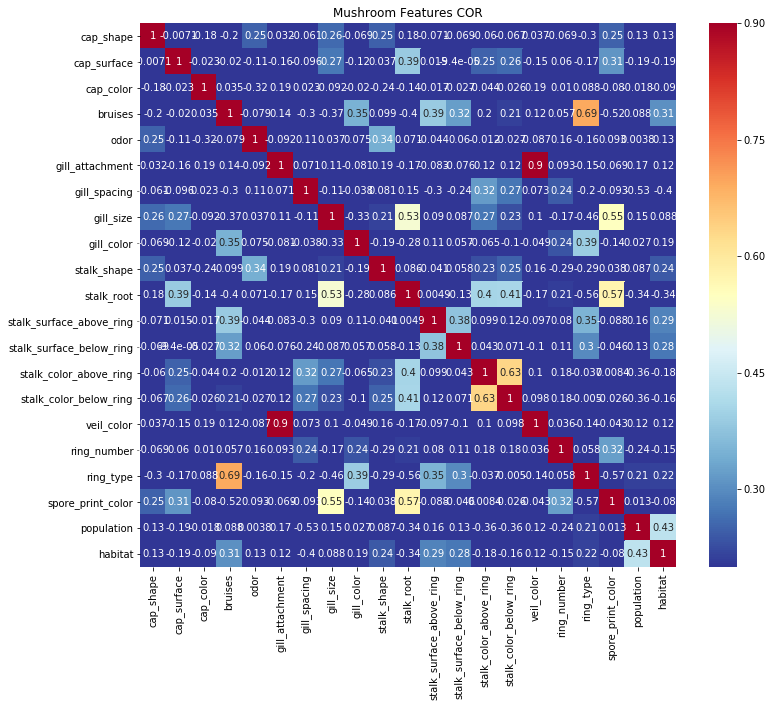

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation=x_mushroom.corr()
plt.figure(figsize=(12,10))

sns.heatmap(correlation, cmap=plt.cm.RdYlBu_r,  vmin = 0.2, annot = True, vmax = 0.9)
plt.title('Mushroom Features COR');

In [32]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x_mushroom, y_mushroom, train_size=0.7)
print(xtrain.shape, xtest.shape, ytrain.shape, ytest.shape)

(5686, 21) (2438, 21) (5686, 1) (2438, 1)


###  logisticRegression Binary Classification

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
model= LogisticRegression()
model.fit(xtrain, ytrain)

C:\Users\student\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\student\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
pred=model.predict(xtest)

In [36]:
pred

array([0, 1, 0, ..., 1, 0, 1], dtype=int64)

In [37]:
ytest

,type
1292,0
5842,1
2028,0
1462,0
8059,1
...,...
7733,1
4521,1
6889,1
2048,0


In [42]:
from sklearn import metrics
import statsmodels.api as sm

print(model.score(xtrain, ytrain))
print(model.score(xtest, ytest))

print("Accuracy:", metrics.accuracy_score(ytest, pred)) #분류가 잘됬음을 확인.

0.95444952514949
0.9536505332239541
정확도: 0.9536505332239541


### Knn Binary Classification 

In [90]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(xtrain, ytrain)

C:\Users\student\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [91]:
pred_2=knn.predict(xtest)

In [92]:
print(knn.score(xtrain, ytrain))
print(knn.score(xtest, ytest))
print("Accuracy:", metrics.accuracy_score(ytest, pred_2) )

0.9977136827295111
0.9975389663658737
Accuracy: 0.9975389663658737


### t-sne 를 통한 데이터 분류 상태 확인 

In [48]:
from sklearn.manifold import TSNE

mash_tsne_result=TSNE(learning_rate=300, init='pca').fit_transform(x_mushroom)

In [72]:
x_mushroom

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,2,3,0,1,7,1,0,1,0,0,...,3,3,7,7,2,1,4,0,3,4
1,2,3,9,1,0,1,0,0,0,0,...,3,3,7,7,2,1,4,1,2,0
2,0,3,8,1,1,1,0,0,1,0,...,3,3,7,7,2,1,4,1,2,2
3,2,2,8,1,7,1,0,1,1,0,...,3,3,7,7,2,1,4,0,3,4
4,2,3,3,0,6,1,1,0,0,1,...,3,3,7,7,2,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,4,3,0,0,6,0,0,0,11,0,...,3,3,4,4,1,1,4,2,1,1
8120,2,3,0,0,6,0,0,0,11,0,...,3,3,4,4,0,1,4,2,4,1
8121,3,3,0,0,6,0,0,0,1,0,...,3,3,4,4,1,1,4,2,1,1
8122,4,2,0,0,3,1,0,1,2,1,...,3,2,7,7,2,1,0,7,4,1


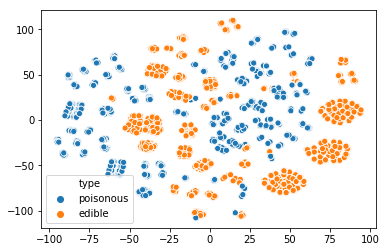

In [99]:
sns.scatterplot(mash_tsne_result[:,0], mash_tsne_result[:,1], hue=target, legend='full')

### 결론 

- mushroom data자체가 분류가 아주 잘되는 data임을 알 수 있다.
- logistic regression: 0.9536505332239541
- KNN : (k=10) 0.9975389663658737
- 이 데이터에서는 logistic regression 보다 knn이 더 분류를 잘한 모델이라고 할 수 있다.